In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [33]:
df = pd.read_csv("data/data.csv", sep=";", parse_dates=["Data"], dayfirst=True, index_col="Data")

In [38]:
df.Importo = df.Importo.apply(lambda x: x.replace(",", ".")).astype(np.float64)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1288 entries, 2021-03-07 to 2021-01-17
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anno               1288 non-null   int64  
 1   Mese               1288 non-null   int64  
 2   Operazione         1288 non-null   object 
 3   Dettagli           1288 non-null   object 
 4   Conto o carta      1288 non-null   object 
 5   Contabilizzazione  1288 non-null   object 
 6   Categoria          1115 non-null   object 
 7   Valuta             1288 non-null   object 
 8   Importo            1288 non-null   float64
 9   Tipologia          1288 non-null   object 
 10  Agente             1288 non-null   object 
 11  Spesa Comune       165 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 130.8+ KB


In [57]:
df

,Anno,Mese,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria,Valuta,Importo,Tipologia,Agente,Spesa Comune
Data,,,,,,,,,,,,
2021-03-07,2021,3,Lafeltrinelli Internet,Lafeltrinelli Internet,SUPERFLASH PAYPASS ****534207002755,NON CONTABILIZZATO,"TV, Internet, telefono",EUR,-24.65,C,M,Y
2021-03-06,2021,3,Paypal *edt Srl,Paypal *edt Srl 35314369001,SUPERFLASH PAYPASS ****534207002755,NON CONTABILIZZATO,"Libri, film e musica",EUR,-19.95,C,M,Y
2021-03-05,2021,3,Addebito Diretto Disposto A Favore Di FINDOMES...,Cod. Disp.012102240qooek Nomefindomestic Banca...,Conto 1000/00071165,CONTABILIZZATO,Rate Mutuo e Finanziamento,EUR,-35.44,C,M,NaN
2021-03-05,2021,3,Investimento Previdenza Complementare,N.D,Conto 1000/00071165,CONTABILIZZATO,Rate piani pensionistici,EUR,-100.00,A,M,NaN
2021-03-03,2021,3,Sepa Direct Debit Superflash,Sepa Direct Debit Superflash Assago,SUPERFLASH PAYPASS ****534207002755,CONTABILIZZATO,Addebiti vari,EUR,-0.50,C,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-20,2021,1,COMMISSIONE BANCOPOSTA DI ADDEBITO SDD SATISPA...,COMMISSIONE BANCOPOSTA DI ADDEBITO SDD SATISPA...,CONTO,CONTABILIZZATO,Addebiti vari,EUR,-0.40,C,A,NaN
2021-01-19,2021,1,RATA PIANO DI ACCUMULO BANCOPOSTA MI CID.IT76H...,RATA PIANO DI ACCUMULO BANCOPOSTA MI CID.IT76H...,CONTO,CONTABILIZZATO,Fondi e Polizze,EUR,-100.00,A,A,NaN
2021-01-19,2021,1,ADDEBITO DIRETTO PREAUTORIZZATO SATISPAY EURO ...,ADDEBITO DIRETTO PREAUTORIZZATO SATISPAY EURO ...,CONTO,CONTABILIZZATO,Addebiti vari,EUR,-26.00,C,A,NaN


In [59]:
df["Categoria "]

Data
2021-03-07        TV, Internet, telefono
2021-03-06          Libri, film e musica
2021-03-05    Rate Mutuo e Finanziamento
2021-03-05      Rate piani pensionistici
2021-03-03                 Addebiti vari
                         ...            
2021-01-20                 Addebiti vari
2021-01-19               Fondi e Polizze
2021-01-19                 Addebiti vari
2021-01-17        TV, Internet, telefono
2021-01-17             Bonifici ricevuti
Name: Categoria , Length: 1288, dtype: object

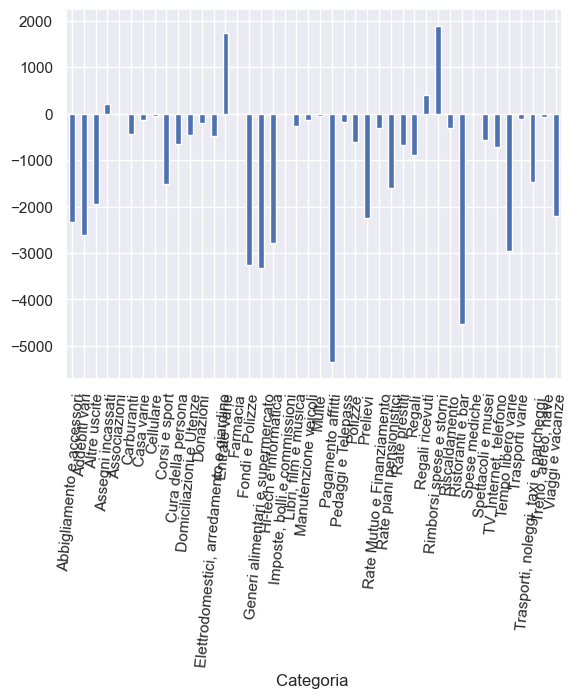

In [75]:
df.groupby(by="Categoria ").sum()["Importo"].drop(["Stipendi e pensioni", "Bonifici in uscita", "Bonifici ricevuti"]).plot(kind="bar")
plt.xticks(rotation=85)
plt.show()